# Density Estimation

### Preliminaries

- Goal 
  - Simple maximum likelihood estimates for Gaussian and categorical distributions
- Materials        
  - Mandatory
    - These lecture notes
  - Optional
    - Bishop pp. 67-70, 74-76, 93-94      

### Why Density Estimation?

Density estimation relates to building a model $p(x|\theta)$ from observations $D=\{x_1,\dotsc,x_N\}$. 

Why is this interesting? Some examples:

- **Outlier detection**. Suppose $D=\{x_n\}$ are benign mammogram images. Build $p(x | \theta)$ from $D$. Then low value for $p(x^\prime | \theta)$ indicates that $x^\prime$ is a risky mammogram.


- **Compression**. Code a new data item based on **entropy**, which is a functional of $p(x|\theta)$: 
$$
H[p] = -\sum_x p(x | \theta)\log p(x |\theta)
$$


- **Classification**. Let $p(x | \theta_1)$ be a model of attributes $x$ for credit-card holders that paid on time and $p(x | \theta_2)$ for clients that defaulted on payments. Then, assign a potential new client $x^\prime$ to either class based on the relative probability of $p(x^\prime | \theta_1)$ vs. $p(x^\prime|\theta_2)$.


<div style="color:green">
### Example Problem

- Consider a set of observations $D=\{x_1,…,x_N\}$ in the 2-dimensional plane (see Figure). All observations were generated by the same process. We now draw an extra observation $x_\bullet = (a,b)$ from the same data generating process. 

- What is the probability that $x_\bullet$ lies within the rectangle $S \triangleq\{\,0<a<2\,,\,1<b<2\}$ (shaded area)?  

</div> <span></span>




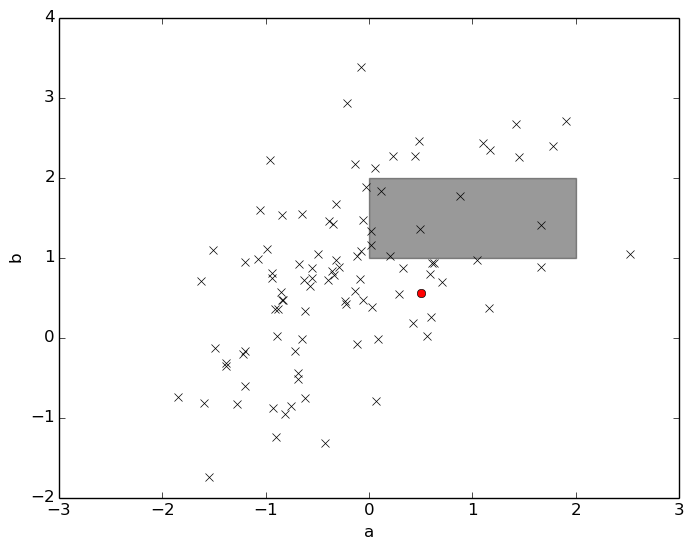

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8465d1a910>

In [1]:
using Distributions, PyPlot
N = 100
generative_dist = MvNormal([0,1.], [0.8 0.5; 0.5 1.0])
function plotObservations(obs::Matrix)
    plot(obs[1,:]', obs[2,:]', "kx", zorder=3)
    fill_between([0., 2.], 1., 2., color="k", alpha=0.4, zorder=2) # Shaded area
    xlim([-3,3]); ylim([-2,4]); xlabel("a"); ylabel("b")
end
D = rand(generative_dist, N) # Generate observations from generative_dist
plotObservations(D)
x_dot = rand(generative_dist) # Generate x∙
plot(x_dot[1], x_dot[2], "ro")

### Log-Likelihood for a Multivariate Gaussian (MVG)

- Assume we are given a set of IID data points $D=\{x_1,\ldots,x_N\}$, where $x_n \in \mathbb{R}^D$. We want to build a model for these data.

- **Model specification**. Let's assume a MVG model $x_n=\mu+\epsilon_n$ with $\epsilon_n \sim \mathcal{N}(0,\Sigma)$, or equivalently,

$$\begin{align*}
p(x_n|\mu,\Sigma) &= \mathcal{N}(x_n|\mu,\Sigma) \\
&= |2 \pi \Sigma|^{-1/2} \mathrm{exp} \left\{-\frac{1}{2}(x_n-\mu)^T
\Sigma^{-1} (x_n-\mu) \right\}
\end{align*}$$

- Since the data are IID, $p(D|\theta)$ factorizes as

$$  
p(D|\theta) = p(x_1,\ldots,x_N|\theta) \stackrel{\text{IID}}{=} \prod_n p(x_n|\theta)
$$

- This choice of model yields the following log-likelihood (use (B-C.9) and (B-C.4)),
$$\begin{align*}
 \log p(D|\theta) &= \log \prod_n p(x_n|\theta) \\
 &= \sum_n \log \mathcal{N}(x_n|\mu,\Sigma) \tag{1} \\
     &= N \cdot \log | 2\pi\Sigma |^{-1/2} - \frac{1}{2} \sum\nolimits_{n} (x_n-\mu)^T \Sigma^{-1} (x_n-\mu) 
 \end{align*}$$



### Maximum Likelihood estimation of mean of MVG

We want to maximize $\log p(D|\theta)$ wrt the parameters $\theta=\{\mu,\Sigma\}$. Let's take derivatives; first to mean $\mu$, (making use of  (B-C.25) and (B-C.27)),

$$\begin{align*}
\nabla_\mu \log p(D|\theta) &= -\frac{1}{2}\sum_n \nabla_\mu \left[ (x_n-\mu)^T \Sigma^{-1} (x_n-\mu) \right] \\
&= -\frac{1}{2}\sum_n \nabla_\mu \mathrm{Tr} \left[ -2\mu^T\Sigma^{-1}x_n + \mu^T\Sigma^{-1}\mu \right]  \\
&= -\frac{1}{2}\sum_n \left( -2\Sigma^{-1}x_n + 2\Sigma^{-1}\mu \right) \\
&= \Sigma^{-1}\,\sum_n \left( x_n-\mu \right)
\end{align*}$$

Set to zero yields the **sample mean**
$$\begin{equation*}
\boxed{
\hat \mu = \frac{1}{N} \sum_n x_n
}
\end{equation*}$$



### Maximum Likelihood estimation of variance of MVG

Now we take the gradient of the log-likelihood **wrt the precision matrix** $\Sigma^{-1}$ (making use of B-C.28 and B-C.24)

$$\begin{align*}
\nabla_{\Sigma^{-1}}  &\log p(D|\theta) \\
&= \nabla_{\Sigma^{-1}} \left[ \frac{N}{2} \log |2\pi\Sigma|^{-1} - \frac{1}{2} \sum_{n=1}^N (x_n-\mu)^T \Sigma^{-1} (x_n-\mu)\right] \\
&= \nabla_{\Sigma^{-1}} \left[ \frac{N}{2} \log |\Sigma^{-1}| - \frac{1}{2} \sum_{n=1}^N \mathrm{Tr} \left[ (x_n-\mu) (x_n-\mu)^T \Sigma^{-1}\right] \right]\\
&= \frac{N}{2}\Sigma -\frac{1}{2}\sum_n (x_n-\mu)(x_n-\mu)^T
\end{align*}$$

Get optimum by setting the gradient to zero,
$$\begin{equation*}
\boxed{
\hat \Sigma = \frac{1}{N} \sum_n (x_n-\hat\mu)(x_n - \hat\mu)^T}
\end{equation*}$$
which is the **sample variance**.


### <span style="color:red">(OPTIONAL SLIDE)</span> Sufficient Statistics

Note that the ML estimates can also be written as
$$\begin{equation*}
\hat \Sigma = \sum_n x_n x_n^T - \left( \sum_n x_n\right)\left( \sum_n x_n\right)^T, \quad \hat \mu = \frac{1}{N} \sum_n x_n
\end{equation*}$$

I.o.w., the two statistics (a 'statistic' is a function of the data) $\sum_n x_n$ and $\sum_n x_n x_n^T$ are sufficient to estimate the parameters $\mu$ and $\Sigma$ from $N$ observations. In the literature, $\sum_n x_n$ and  $\sum_n x_n x_n^T$ are called **sufficient statistics**.

Sufficient statistics are useful because they summarize all there is to learn about the data set in a minimal set of variables . 

### Solution to Example Problem

We apply maximum likelihood estimation to fit a 2-dimensional Gaussian distribution $m$ to data set $D$. Next, we evaluate $p(x_\bullet \in S | m)$ by (numerical) integration of the Gaussian pdf over $S$: $p(x_\bullet \in S | m) = \int_S p(x|m) \mathrm{d}x$.

p(x⋅∈S|m) ≈ 0.16353682064910158


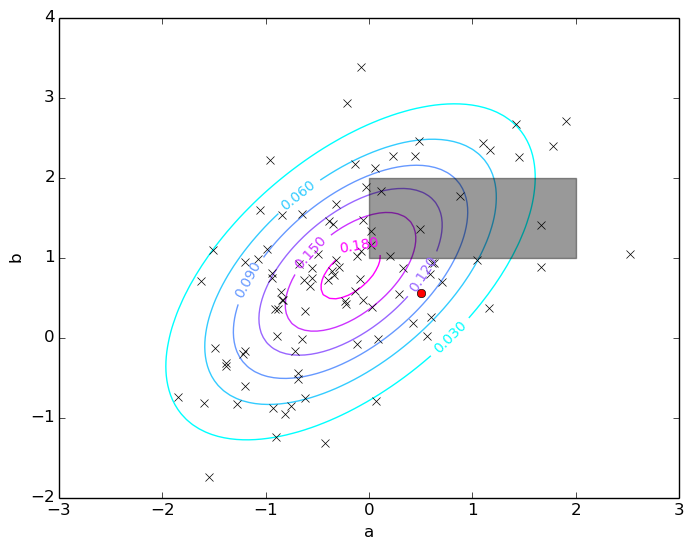

In [2]:
using Cubature # Numerical integration package
m = fit_mle(FullNormal, D) # Maximum likelihood estimation of 2D Gaussian

# Contour plot of estimated Gaussian density
A = Matrix{Float64}(100,100); B = Matrix{Float64}(100,100)
density = Matrix{Float64}(100,100)
for i=1:100
    for j=1:100
        A[i,j] = a = (i-1)*6/100.-2
        B[i,j] = b = (j-1)*6/100.-3
        density[i,j] = pdf(m, [a,b])
    end
end
c = contour(A, B, density, 6, zorder=1)
PyPlot.set_cmap("cool")
clabel(c, inline=1, fontsize=10)

# Plot observations, x∙, and the countours of the estimated Gausian density
plotObservations(D)
plot(x_dot[1], x_dot[2], "ro")

# Numerical integration of p(x|m) over S:
(val,err) = hcubature((x)->pdf(m,x), [0., 1.], [2., 2.])
println("p(x⋅∈S|m) ≈ $(val)")

### Discrete Data: the 1-of-K Coding Scheme

- Consider a coin-tossing experiment with outcomes $x \in\{0,1\}$ (corresponding to tail and head, resp.) and $0\leq \mu \leq 1$ the probability of heads. This model can written as a **Bernoulli distribution**:
$$ 
p(x|\mu) = \mu^{x}(1-\mu)^{1-x}
$$
  - Note that in expression $\mu^{x}(1-\mu)^{1-x}$, the variable $x$ acts as a (binary) **selector** for the tail or head probabilities. Think of this as an 'if'-statement in programming. 


- **1-of-K scheme**. Now consider a $K$-sided coin, a.k.a. a _die_ (pl.: dice). It will be very convenient to code the outcomes by a vector $x=(x_1,\ldots,x_K)^T$ with **binary selection variables**
$$
x_k = \begin{cases} 1 & \text{if die landed on $k$th face}\\
0 & \text{otherwise} \end{cases}
$$
  - E.g., For $K=6$, if the die lands on the 3rd face, we encode that as $x=(0,0,1,0,0,0)^T$.

- Assume the probabilities $p(x_k=1) = \mu_k$ with  $\sum_k \mu_k  = 1$. The data generating distribution is then (note the similarity to the Bernoulli distribution)
$$
p(x|\mu) = \mu_1^{x_1} \mu_2^{x_2} \cdots \mu_k^{x_k}=\prod_k \mu_k^{x_k}
$$


- This generalized Bernoulli distribution is called the **categorical distribution** (or sometimes the 'multi-noulli' distribution).


- Note that $\sum_k x_k = 1$ and verify for yourself that $\mathrm{E}[x|\mu] = \mu$.

<!---
- In these notes, we use the superscript to indicate that we are working with a **binary selection variable** in a 1-of-$K$ scheme.
--->


### Categorical vs. Multinomial Distribution

- Observe a data set $D=\{x_1,\ldots,x_N\}$  of $N$ IID rolls of a $K$-sided die, with generating PDF
$$
p(D|\mu) = \prod_n \prod_k \mu_k^{x_{nk}} = \prod_k \mu_k^{\sum_n x_{nk}} = \prod_k \mu_k^{m_k}
$$
where $m_k= \sum_n x_{nk}$ is the total number of occurrences that we 'threw' $k$ eyes.

- This distribution depends on the observations **only** through the quantities $\{m_k\}$, with generally $K \ll N$. 

- A related distribution is the distribution over $D_m=\{m_1,\ldots,m_K\}$, which is called the **multinomial distribution**,
$$
p(D_m|\mu) =\frac{N!}{m_1! m_2!\ldots m_K!} \,\prod_k \mu_k^{m_k}\,.
$$

- $p(D|\mu) = p(\,x_1,\ldots,x_N\,|\,\mu\,)$ is a distribution over the individual observations, whereas $p(D_m|\mu) = p(\,m_1,\ldots,m_K\,|\,\mu\,)$ is a distribution over the data frequencies $m_k$.



### Maximum Likelihood Estimation for the Multinomial

Now let's find the ML estimate for $\mu$, based on $N$ throws of a $K$-sided die. Again we use the shorthand $m_k \triangleq \sum_n x_{nk}$. 

- The log-likelihood for the multinomial distribution is given by

$$\begin{align*}
\mathrm{L}(\mu) &\triangleq \log p(D_m|\mu) \propto \log \prod_k \mu_k^{m_k} \\
    &=  \sum_k m_k \log \mu_k \tag{2}
\end{align*}$$

- When doing ML estimation, we must obey the constraint $\sum_k \mu_k  = 1$, which can be accomplished by a <span style="color:red">Lagrange multiplier</span>. The augmented log-likelihood with Lagrange multiplier is then

$$
\mathrm{L}^\prime(\mu) = \sum_k m_k \log \mu_k  + \lambda \cdot (1 - \sum_k \mu_k )
$$

- Set derivative to zero yields the **sample proportion** for $\mu_k$ 

$$\begin{equation*}
\nabla_{\mu_k}   \mathrm{L}^\prime = \frac{m_k }
{\hat\mu_k } - \lambda  \overset{!}{=} 0 \; \Rightarrow \; \boxed{\hat\mu_k = \frac{m_k }{N}}
\end{equation*}$$

where we get $\lambda$ from the constraint 

$$\begin{equation*}
\sum_k \hat \mu_k = \sum_k \frac{m_k}
{\lambda} = \frac{N}{\lambda} \overset{!}{=}  1
\end{equation*}$$

<!---
- Interesting special case: **Binomial** (=$N$ coin tosses): 
$$p(x_n|\theta)= \theta^{[x_n=h]}(1-\theta)^{[x_n=t]}=\theta_h^{[x_n=h]} \theta_t^{[x_n=t]}
$$ 
yields $$\hat \theta = \frac{N_h}{N_h +N_t} $$

- Compare this answer to Laplace's rule for predicting the next coin toss (in probability theory lesson) $$p(\,x_\bullet=h\,|\,\theta\,)=\frac{N_h+1}{N_h +N_t+2}\,.$$ What is the source of the difference?
--->


### Recap ML for Density Estimation

Given $N$ IID observations $D=\{x_1,\dotsc,x_N\}$

- For a **multivariate Gaussian** model $p(x_n|\theta) = \mathcal{N}(x_n|\mu,\Sigma)$, we obtain ML estimates

$$\begin{align}
\hat \mu &= \frac{1}{N} \sum_n x_n \tag{sample mean} \\
\hat \Sigma &= \frac{1}{N} \sum_n (x_n-\hat\mu)(x_n - \hat \mu)^T \tag{sample variance}
\end{align}$$

- For discrete outcomes modeled by a 1-of-K **categorical distribution** we find

$$\begin{align}
\hat\mu_k  = \frac{1}{N} \sum_n x_{nk} \quad \left(= \frac{m_k}{N} \right) \tag{sample proportion}
\end{align}$$
  
  
- Note the similarity for the means between discrete and continuous data. 

- We didn't use a co-variance matrix for discrete data. Why?


-----
_The cell below loads the style file_


In [1]:
open("../../styles/aipstyle.html") do f
    display("text/html", readall(f))
end

<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->